In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

### DATA ANALYSIS AND FEATURE ENGINEERING

The original 'books.csv' file has been corrected because there were some errors that prevented it from being loaded.


In [55]:
# Download the Books list
# df_Books = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\Book_Rating\books.csv", sep=",", index_col='bookID')
df_Books = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\books.csv", sep=",")

In [56]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              14485 non-null  int64  
 1   title               14485 non-null  object 
 2   authors             14485 non-null  object 
 3   average_rating      14485 non-null  float64
 4   isbn                14485 non-null  object 
 5   isbn13              14485 non-null  object 
 6   language_code       14485 non-null  object 
 7   num_pages           14485 non-null  int64  
 8   ratings_count       14485 non-null  int64  
 9   text_reviews_count  14485 non-null  int64  
 10  publication_date    14485 non-null  object 
 11  publisher           14485 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.3+ MB


### Step 1 : Adding book's genre in the data frame Books


In [57]:
# Step 1 and 2 are too long. We start by loading the df_Genre from csv file
df_Genre_Bright = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\Book_Rating\Genre.csv", sep=",")

# Create a mapping dictionary containing only BookID and BookGenre
book_genre_map = dict(zip(df_Genre_Bright['bookID'], df_Genre_Bright['book_genre']))

# Convert the bookID column in dataframe Genre from object to int64
df_Genre_Bright['bookID'] = df_Genre_Bright['bookID'].astype('int64')

# Add bookgenre map to the Books dataframe using the map function
df_Books['book_genre'] = df_Books['bookID'].map(book_genre_map)


In [58]:
df_Books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,"genres.fantasy, paranormal"
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,"genres.fantasy, paranormal"
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,"genres.fantasy, paranormal"
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,genres.fiction
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,"genres.fantasy, paranormal"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14480,7893338,Enchanting Moments: A Moving Picture Book,Walt Disney Company,3.64,1423131436,9.78142E+12,eng,16,11,3,07/20/2010,Disney Press,"genres.history, historical fiction, biography"
14481,23983685,"Oddly Normal, Book 1",Otis Frampton,3.88,1632152266,9.78163E+12,eng,128,487,132,03/24/2015,Image Comics,"genres.comics, graphic"
14482,27564759,Und dann gab's keines mehr,Agatha Christie,4.23,3455650716,9.78346E+12,ger,223,18,2,09/04/2015,Atlantik,"genres.mystery, thriller, crime"
14483,29467563,"Uncanny Avengers: Unity, Volume 2: The Man Who...",Gerry Duggan,3.37,785196161,9.78079E+12,en-GB,136,166,27,10/04/2016,Marvel,"genres.comics, graphic"


In [59]:
# Print rows where the value in column book_genre is NaN
print(df_Books[df_Books['book_genre'].isna()])

       bookID                                              title  \
29         51  Hatchet: A Guide for Using "Hatchet" in the Cl...   
31         54                      Molly Hatchet - 5 of the Best   
55         89  Active Literacy Across the Curriculum: Strateg...   
56         90                    Simply Beautiful Beaded Jewelry   
58         92  Mapping the Big Picture: Integrating Curriculu...   
...       ...                                                ...   
11103   45557   Co. Aytch: A Confederate Memoir of the Civil War   
11104   45564                             Jonny Reb & Billy Yank   
11106   45570                                   Fantastic Mr Fox   
11107   45572                 Fantastic Mr. Fox (Cover to Cover)   
11112   45595                       La Tía Julia y el Escribidor   

                                              authors  average_rating  \
29     Donna Ickes/Edward Sciranko/Keith Vasconcelles            4.00   
31                                   

In [60]:
# Where are the NaN columns
df_Books.isna().sum()

bookID                   0
title                    0
authors                  0
average_rating           0
isbn                     0
isbn13                   0
language_code            0
num_pages                0
ratings_count            0
text_reviews_count       0
publication_date         0
publisher                0
book_genre            1821
dtype: int64

### Step 2 - Convert categorical variable into dummy/indicator variables.

Remark : Only 1824 books have no genre out of a total of 11127 books, which represents 16% of the total.

In [61]:
# Convert column book_genre into indicators
df_Books=pd.concat([df_Books, pd.get_dummies(df_Books.book_genre)],axis=1)
# A look at the df
df_Books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   bookID                                         14485 non-null  int64  
 1   title                                          14485 non-null  object 
 2   authors                                        14485 non-null  object 
 3   average_rating                                 14485 non-null  float64
 4   isbn                                           14485 non-null  object 
 5   isbn13                                         14485 non-null  object 
 6   language_code                                  14485 non-null  object 
 7   num_pages                                      14485 non-null  int64  
 8   ratings_count                                  14485 non-null  int64  
 9   text_reviews_count                             144

### Step 3 - Calculate the seniority of the books
From the Publication date until today.

In [62]:
from datetime import datetime

# Check if column publication_date is correct 
for index, row in df_Books.iterrows():
    try:
        date_obj = datetime.strptime(row['publication_date'], '%m/%d/%Y')
    except ValueError as e:
        print(f"Error in row {index}: {e}")
        print("Row details:", row)

# There are no incorrect rows

In [63]:
# Check if column publication_date is correct 
for index, row in df_Books.iterrows():
    try:
        date_obj = datetime.strptime(row['publication_date'], '%m/%d/%Y')
    except ValueError as e:
        print(f"Error in row {index}: {e}")
        print("Row details:", row)



In [64]:
# Convert 'publication_date' to datetime with US format
df_Books['publication_date'] = pd.to_datetime(df_Books['publication_date'], format='%m/%d/%Y')

In [65]:
from datetime import datetime

# Calculate the number of months from the Publication date until today
today = datetime.today()
df_Books['Months_Until_Today'] = (today.year - df_Books['publication_date'].dt.year) * 12 + (today.month - df_Books['publication_date'].dt.month)

In [66]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   bookID                                         14485 non-null  int64         
 1   title                                          14485 non-null  object        
 2   authors                                        14485 non-null  object        
 3   average_rating                                 14485 non-null  float64       
 4   isbn                                           14485 non-null  object        
 5   isbn13                                         14485 non-null  object        
 6   language_code                                  14485 non-null  object        
 7   num_pages                                      14485 non-null  int64         
 8   ratings_count                                  14485 non

### Step 4 : Book's language

Grouping English-language books under a single code eng.


In [67]:
# df_Books['language_code'] = df_Books['language_code'].apply(lambda x: 'eng' if x in ['en-CA','en-GB','en-US','enm'])

df_Books['language_code'].replace(['en-CA', 'en-GB', 'en-US', 'enm'],'eng', inplace=True)


### Step 5 : Work on the authors
We will keep only the name of the first author.

In [68]:
# Split the author column to keep only the name of the writer
df_Books[['authors','co-authors']] = df_Books['authors'].str.split(pat='/', n=1, expand=True)
#df_Books[['authors','co-authors']]=df_Books['authors'].str.split('/', 1, expand=True)

# Add a column with the average ratings per authors for all its books.
# 1) calculate the average ratings by authors
#average_ratings = df_Books.groupby('authors')['average_rating'].mean()
# 2) Merge the average ratings back into the original DataFrame df_Books
#df_Books['authors_rating'] = df_Books['authors'].map(average_ratings)


We add the rating of the author (called author_rating) coming from the file Authors.csv

In [69]:
# Load the csv file
df_Authors = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\Authors.csv",sep=",")

# Create a mapping dictionnary containing only the columns name and average_rating
auteur_map = dict(zip(df_Authors['name'], df_Authors['average_rating']))

# Adding Authors rating to df-Books
df_Books['author_rating'] = df_Books['authors'].map(auteur_map)

# For the authors not in the csv file, we give a note of zero.
df_Books['author_rating'] = df_Books['author_rating'].fillna(0)



### Step 6: Adding format of the books
We add the format of the book (paper, audio,...) from the file BooksList.csv

In [70]:
# Load BooksList.csv
df_BooksList = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\BooksList.csv", sep=",")


C:\Users\gunon\AppData\Local\Temp\ipykernel_15036\2016962447.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BooksList = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\BooksList.csv", sep=",")


In [71]:
# Create a mapping dictionary containing only BookID and Format from the file BooksList.csv
book_format = dict(zip(df_BooksList['book_id'], df_BooksList['format']))

# Add format to the Books dataframe using the map function
df_Books['book_format'] = df_Books['bookID'].map(book_format)

# Group book's format into two families: audio / books
df_Books['book_format'] = df_Books['book_format'].fillna('Unknown Binding')
df_Books['book_format'] = df_Books.apply(lambda row: 'audio' if 'audio' in row['publisher'].lower() and
                        row['book_format'] == 'Unknown Binding' else row['book_format'], axis=1)
df_Books['book_format'] = df_Books['book_format'].replace(['Audio', 'Audio CD', 'audio Cassette', 'Audio Cassette'
                        ,'Audiobook', 'MP3 CD'], 'audio')
df_Books['book_format'] = df_Books['book_format'].replace(['Unknown Binding'], 'book')
df_Books['book_format'] = df_Books['book_format'].apply(lambda x: 'book' if x != 'audio' else x)

# get_dummies tranforms categorical data to numbers 0=audio / 1=book
df_Books.loc[:,["audio 0 book 1"]] = pd.get_dummies(df_Books.book_format, drop_first=True).values


C:\Users\gunon\AppData\Local\Temp\ipykernel_15036\2525111033.py:18: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_Books.loc[:,["audio 0 book 1"]] = pd.get_dummies(df_Books.book_format, drop_first=True).values


In [72]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   bookID                                         14485 non-null  int64         
 1   title                                          14485 non-null  object        
 2   authors                                        14485 non-null  object        
 3   average_rating                                 14485 non-null  float64       
 4   isbn                                           14485 non-null  object        
 5   isbn13                                         14485 non-null  object        
 6   language_code                                  14485 non-null  object        
 7   num_pages                                      14485 non-null  int64         
 8   ratings_count                                  14485 non

In [77]:
# Remove books with no book's Genre
df_Books = df_Books.dropna(subset=['book_genre'])


In [78]:
# Saving Books dataframe with all data 
df_Books.to_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\Books_Final.csv", index=False)


### ANALYSIS


In [81]:
# Load the dataframe to analyse
df_Analysis = pd.read_csv(r"C:\Users\gunon\Documents\bootcamp-main\3-projects\ML_Book_Valuations\Books_Final.csv", sep=",")

In [82]:
# Remove columns 
df_Analysis = df_Analysis.drop(columns=['bookID', 'isbn', 'publisher', 'co-authors', 'book_format'])
# We keep ISBN13 for the analysis if we need to look at the book

In [83]:
df_Analysis.describe()

,average_rating,num_pages,ratings_count,text_reviews_count,genres.children,"genres.comics, graphic","genres.fantasy, paranormal",genres.fiction,"genres.history, historical fiction, biography","genres.mystery, thriller, crime",genres.non-fiction,genres.poetry,genres.romance,genres.young-adult,Months_Until_Today,author_rating,audio 0 book 1
count,12664.000000,12664.000000,1.266400e+04,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000,12664.000000
mean,3.931121,330.688803,1.617063e+04,502.765398,0.050616,0.036481,0.106917,0.313171,0.118604,0.096257,0.172694,0.021873,0.060960,0.022426,245.245420,3.936840,0.984681
std,0.321569,222.217566,1.070340e+05,2506.958674,0.219221,0.187492,0.309020,0.463802,0.323335,0.294955,0.377998,0.146275,0.239267,0.148070,107.770743,0.273413,0.122823
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-937.000000,0.000000,0.000000
25%,3.760000,206.000000,9.800000e+01,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,3.810000,1.000000
50%,3.950000,302.000000,6.190000e+02,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,228.000000,3.950000,1.000000
75%,4.140000,400.000000,4.139500e+03,212.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.000000,4.080000,1.000000
max,5.000000,6576.000000,4.597666e+06,94265.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1484.000000,5.000000,1.000000


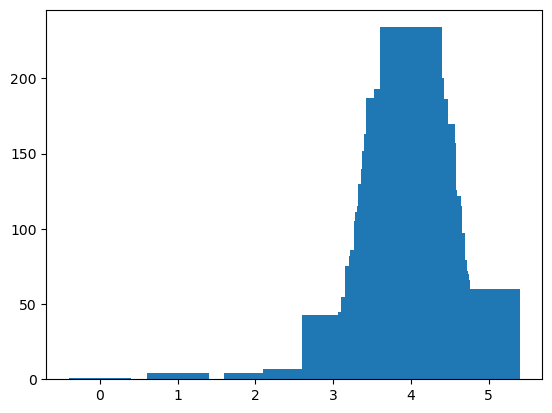

In [92]:
plt.bar(x=df_Analysis.average_rating.value_counts().index,height=df_Analysis.average_rating.value_counts())
plt.show()

<Axes: xlabel='average_rating', ylabel='Proportion'>

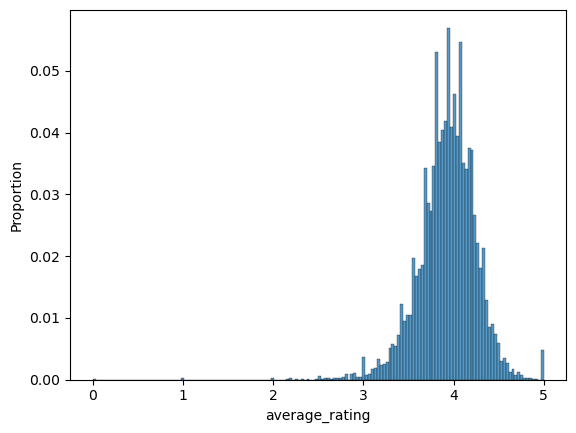

In [102]:
sns.histplot(df_Analysis.average_rating, stat='proportion')

<function matplotlib.pyplot.show(close=None, block=None)>

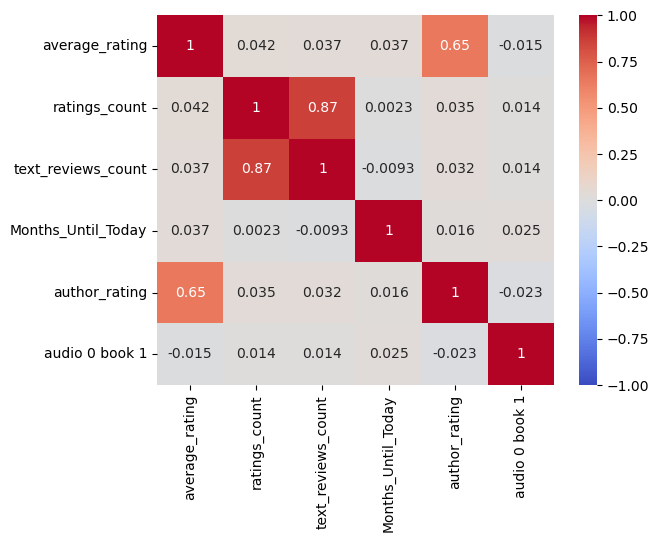

In [88]:
df_corr = df_Analysis[["average_rating", "ratings_count", "text_reviews_count","Months_Until_Today","author_rating",
                       "audio 0 book 1"]]
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show

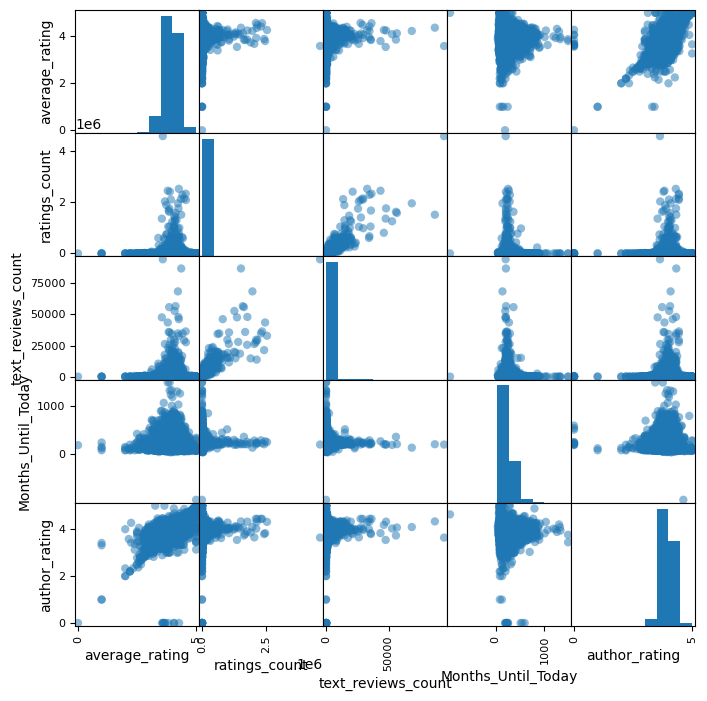

In [85]:
pd.plotting.scatter_matrix(df_corr, figsize=(8,8), marker="o")
plt.show()
     


In [89]:
df_Analysis.sum()

title                                            Harry Potter and the Half-Blood Prince (Harry ...
authors                                          J.K. RowlingJ.K. RowlingJ.K. RowlingJ.K. Rowli...
average_rating                                                                            49783.72
isbn13                                           9780439785969978043935807197804395548939780439...
language_code                                    engengengengengengengengengengengengengengenge...
num_pages                                                                                  4187843
ratings_count                                                                            204784845
text_reviews_count                                                                         6367021
publication_date                                 2006-09-162004-09-012003-11-012004-05-012004-0...
book_genre                                       genres.fantasy, paranormalgenres.fantasy, para...
genres.chi

In [90]:
Genre_PT=pd.pivot_table(df_Analysis, values='average_rating', index='book_genre', aggfunc=[np.mean, np.count_nonzero])
Genre_PT

,mean,count_nonzero
,average_rating,average_rating
book_genre,,
genres.children,4.010515,641
"genres.comics, graphic",4.080238,462
"genres.fantasy, paranormal",3.984542,1354
genres.fiction,3.863596,3966
"genres.history, historical fiction, biography",3.996298,1501
"genres.mystery, thriller, crime",3.883199,1219
genres.non-fiction,3.973155,2187
genres.poetry,4.119314,277
